In [1]:
import tensorflow as tf
import cv2
import sys
import numpy as np
import random
from matplotlib import pyplot as plt


import keras
from keras import losses
from keras.models import Sequential,Model
from keras.layers.core import *
from keras.layers import*
from keras.optimizers import *
from keras.utils import to_categorical
from keras import backend as K

from Mynet import MyNet
from losses import loss

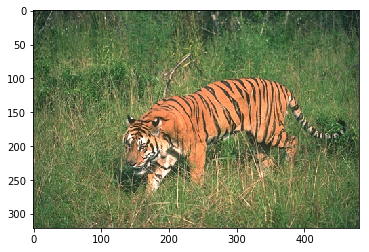

In [32]:
### read the image
img_bgr= cv2.imread("./pytorch-unsupervised-segmentation/BSD500/108004.jpg")
img_rgb = img_bgr[:,:,::-1]
plt.imshow(img_rgb)
plt.show()




In [33]:
### normalize the data
data       = img_rgb.astype('float64')/255.
data       = data.reshape((1,data.shape[0],data.shape[1],data.shape[2]))
Width      = data.shape[1]
Height     = data.shape[2]
### some info about the image
print('Width: ', Width)
print('Height: ',Height)

Width:  321
Height:  481


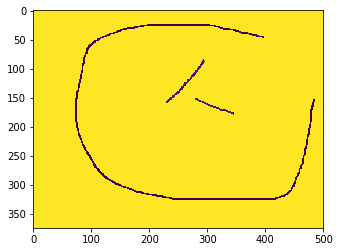

In [34]:
### read the scribble 
mask = cv2.imread("./pytorch-unsupervised-segmentation/PASCAL_VOC_2012/2007_005915_scribble.png",-1)
# mask = mask[:,:,::-1]
plt.imshow(mask)
plt.show()
mask = mask.reshape(-1)
mask_inds = np.unique(mask)
mask_inds = np.delete(mask_inds, np.argwhere(mask_inds==255) )
inds_sim = np.where(mask == 255)[0] 
inds_scr = np.where(mask != 255)[0]
# inds_scr = inds_scr[0:2]
# inds_scr = np
# inds_scr = np.where(mask_rgb == 255)
# print(inds_scr)

In [35]:
### build a mask
index_scr = np.zeros((Width*Height,1)).astype(np.float64)
index_scr[inds_scr] = 1
print(inds_scr)

IndexError: index 154444 is out of bounds for axis 0 with size 154401

In [58]:
lr       = 0.1
momentum = 0.9
decay    = 1

nChannel = 100
nCluster = 150
nCov     = 2
mu       = 0.5
v        = 0.25
scribble = False
# print(inds_scr)
# u        = np.zeros((data.shape[0],data.shape[1]))
# print(data.shape)
model = MyNet(Width,Height,nChannel, nCluster,nCov)
sgd = SGD(lr = lr, decay = decay, momentum = momentum, nesterov = True)
model.summary()
model.compile(optimizer= sgd, loss=loss(mu,nCluster,Width,Height,scribble,v,index_scr).losses)


TypeError: Unexpected keyword argument passed to optimizer: nesterov

In [53]:
num_epoch = 100
# print(data.shape)
model.fit(data, data,epochs = num_epoch)


Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.5411
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 0.5409
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 0.5407
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 0.5406
Epoch 5/100
1/1 [==============================] - 4s 4s/step - loss: 0.5405
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 0.5403
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 0.5402
Epoch 8/100
1/1 [==============================] - 3s 3s/step - loss: 0.5400
Epoch 9/100
1/1 [==============================] - 3s 3s/step - loss: 0.5399
Epoch 10/100
1/1 [==============================] - 3s 3s/step - loss: 0.5396
Epoch 11/100
1/1 [==============================] - 3s 3s/step - loss: 0.5395
Epoch 12/100
1/1 [==============================] - 3s 3s/step - loss: 0.5394
Epoch 13/100
1/1 [==============================] - 3s 3s/step - loss: 0.

In [54]:
### clustering
### cool test data

output = model.predict(data)


In [50]:
### prepare for the colour
label_colours = np.random.randint(255,size=(nCluster,3))

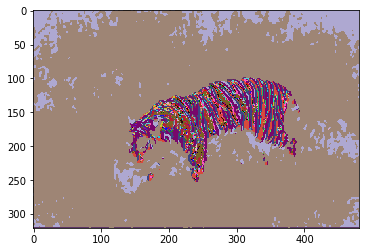

In [55]:
### plot the data ?
labels = np.argmax(output.reshape((Width*Height,nCluster)),axis = 1)
# print(labels.reshape((Width*Height)))
### image show
im_target_rgb = np.array([label_colours[c] for c in labels])
# print(im_target_rgb.shape)
im_target_rgb = im_target_rgb.reshape((Width,Height,3)).astype(np.uint8)

plt.imshow(im_target_rgb)
plt.show()

In [56]:
cv2.imwrite( "tiger_mu005_epoch1000.png", im_target_rgb )

True